<a href="https://colab.research.google.com/github/AmnaShaheena/Machine-Learning-CSH4144-Practical/blob/main/Day05_WeatherForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import tree

In [10]:
data=pd.read_csv("/PlayTennis.csv")

In [19]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [18]:
data.shape

(14, 5)

In [60]:
X,y=data[['Outlook','Temperature','Humidity','Wind']],data['Play Tennis']

In [61]:
one_hot_data=pd.get_dummies(data[['Outlook','Temperature','Humidity','Wind','Play Tennis']],drop_first=False)
one_hot_data_X = pd.get_dummies(X,drop_first=False)
one_hot_data_y = pd.get_dummies(y,drop_first=True)

In [62]:
one_hot_data_X.head(14)

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,False,False,True,False,True,False,True,False,False,True
1,False,False,True,False,True,False,True,False,True,False
2,True,False,False,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,False,True
4,False,True,False,True,False,False,False,True,False,True
5,False,True,False,True,False,False,False,True,True,False
6,True,False,False,True,False,False,False,True,True,False
7,False,False,True,False,False,True,True,False,False,True
8,False,False,True,True,False,False,False,True,False,True
9,False,True,False,False,False,True,False,True,False,True


In [63]:
import matplotlib.pyplot as plt


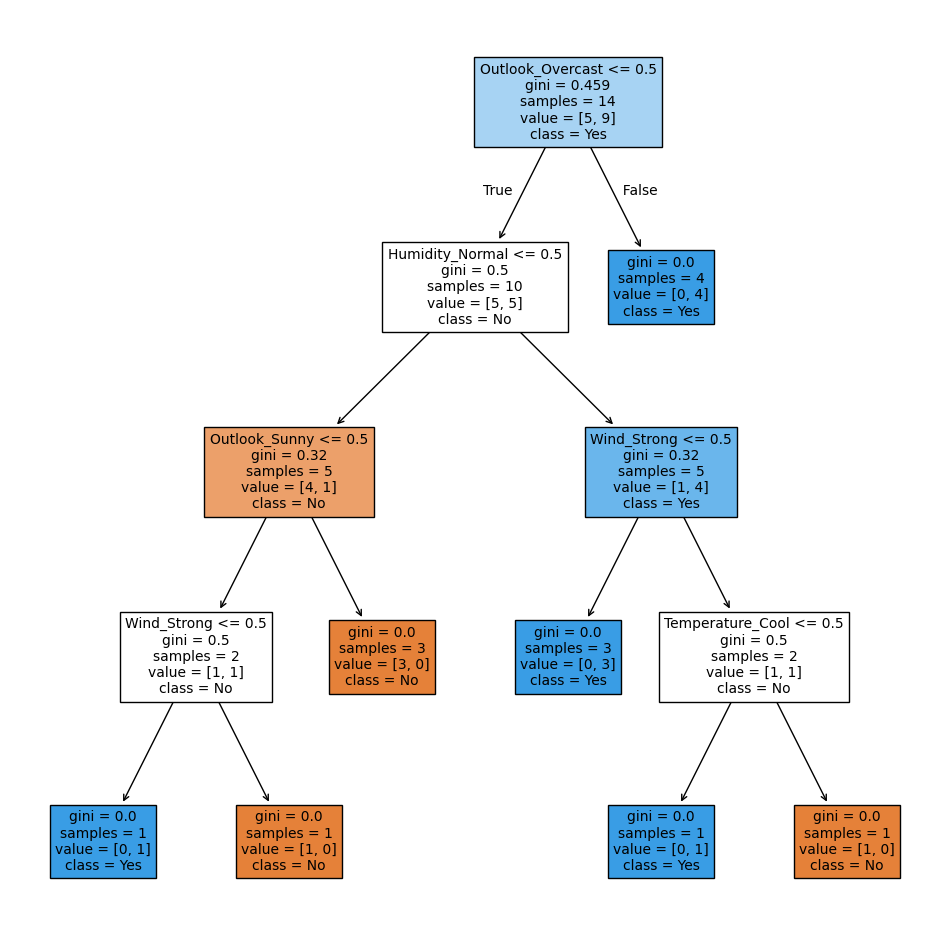

In [64]:
classifier=tree.DecisionTreeClassifier(criterion='gini')
classifier=classifier.fit(one_hot_data_X,one_hot_data_y)
plt.figure(figsize=(12,12))
tree.plot_tree(classifier,filled=True,
               feature_names=one_hot_data_X.columns,
               class_names=['No','Yes'],fontsize=10)
plt.show()

In [55]:
data_Weather_OC=data[data['Outlook']=='Overcast']
data_Weather_OC.head(14)

,Outlook,Temperature,Humidity,Wind,Play Tennis
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [56]:
data_Weather_nonOC=data[data['Outlook']!='Overcast']
data_Weather_nonOC.head(14)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
13,Rain,Mild,High,Strong,No


In [59]:
data_Humidity_High=data[(data['Outlook']=='Overcast') &
                      (data['Humidity']=='Normal')]
display(data_Humidity_High.head())

,Outlook,Temperature,Humidity,Wind,Play Tennis
6,Overcast,Cool,Normal,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
